In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv("CompleteDataSet.csv",low_memory=False,skiprows=[1])

In [26]:
df.columns

Index(['TimeStamps', 'AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
       'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6', 'AnkleLuminosity',
       'RightPocketAccelerometer', 'Unnamed: 9', 'Unnamed: 10',
       'RightPocketAngularVelocity', 'Unnamed: 12', 'Unnamed: 13',
       'RightPocketLuminosity', 'BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20',
       'BeltLuminosity', 'NeckAccelerometer', 'Unnamed: 23', 'Unnamed: 24',
       'NeckAngularVelocity', 'Unnamed: 26', 'Unnamed: 27', 'NeckLuminosity',
       'WristAccelerometer', 'Unnamed: 30', 'Unnamed: 31',
       'WristAngularVelocity', 'Unnamed: 33', 'Unnamed: 34', 'WristLuminosity',
       'BrainSensor', 'Infrared1', 'Infrared2', 'Infrared3', 'Infrared4',
       'Infrared5', 'Infrared6', 'Subject', 'Activity', 'Trial', 'Tag'],
      dtype='object')

In [27]:
data=df[['BeltAccelerometer', 'Unnamed: 16','Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20','Activity']]

In [28]:
data["BeltAccelerometer"]=data["BeltAccelerometer"].astype("float")
data["Unnamed: 16"]=data["Unnamed: 16"].astype("float")
data["Unnamed: 17"]=data["Unnamed: 17"].astype("float")
data["BeltAngularVelocity"]=data["BeltAngularVelocity"].astype("float")
data["Unnamed: 19"]=data["Unnamed: 19"].astype("float")
data["Unnamed: 20"]=data["Unnamed: 20"].astype("float")
data["Activity"]=data["Activity"].astype("float")


C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [29]:
data["Activity"].value_counts()

6.0     54568
7.0     54032
8.0     53689
11.0    50872
10.0    26694
4.0      9248
3.0      9237
1.0      9204
2.0      9188
5.0      9074
9.0      8872
Name: Activity, dtype: int64

In [30]:
Walking=data[data["Activity"]==6].head(8872)
Standing=data[data["Activity"]==7].head(8872)
Sitting=data[data["Activity"]==8].head(8872)
Laying=data[data["Activity"]==11].head(8872)
Jumping=data[data["Activity"]==10].head(8872)
Falling_sideways=data[data["Activity"]==4].head(8872)
Falling_backwards=data[data["Activity"]==3].head(8872)
Falling_forward_using_hands=data[data["Activity"]==1].head(8872)
Falling_forward_using_knees=data[data["Activity"]==2].head(8872)
Falling_sitting_in_empty_chair=data[data["Activity"]==5].head(8872)
Picking_up_an_object=data[data["Activity"]==9].head(8872)


In [31]:
bal_data=pd.DataFrame()
bal_data=bal_data.append([Walking,Standing,Sitting,Laying,Jumping,Falling_sideways,Falling_backwards,
                          Falling_forward_using_hands,Falling_forward_using_knees,Falling_sitting_in_empty_chair,
                          Picking_up_an_object])
print(bal_data["Activity"].value_counts())
np.shape(bal_data)

7.0     8872
5.0     8872
9.0     8872
4.0     8872
11.0    8872
3.0     8872
10.0    8872
2.0     8872
1.0     8872
8.0     8872
6.0     8872
Name: Activity, dtype: int64


(97592, 7)

In [32]:
x=bal_data[['BeltAccelerometer', 'Unnamed: 16','Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20']]
y=bal_data["Activity"]

C:\Users\Rupali\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


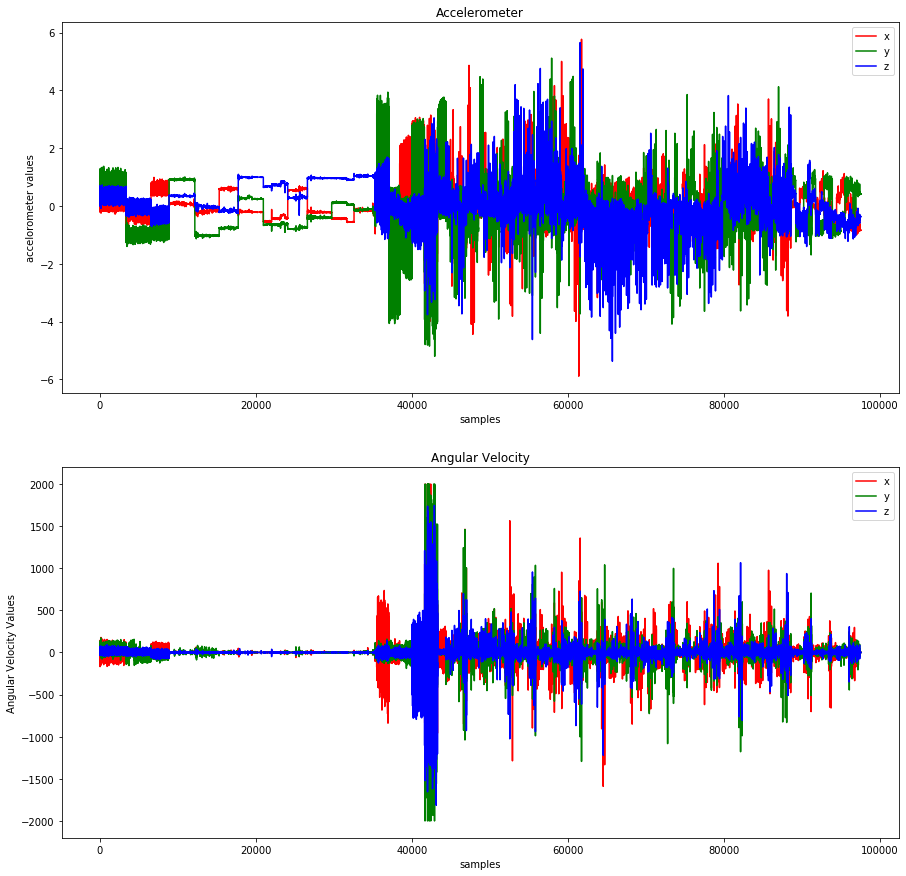

In [33]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
t=np.linspace(0,97592,97592)
ax1.plot(t,x['BeltAccelerometer'],"r")
ax1.plot(t,x['Unnamed: 16'],"g")
ax1.plot(t,x['Unnamed: 17'],"b")
ax1.set(title="Accelerometer",xlabel="samples",ylabel="accelorometer values")
ax1.legend(['x','y','z'])

ax2.plot(t,x['BeltAngularVelocity'],"r")
ax2.plot(t,x['Unnamed: 19'],"g")
ax2.plot(t,x['Unnamed: 20'],"b")
ax2.set(title="Angular Velocity",xlabel="samples",ylabel="Angular Velocity Values")
ax2.legend(['x','y','z'])

plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
yy = np_utils.to_categorical(encoded_Y)

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(x,yy, test_size = 0.3) 


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
import tensorflow as tf
from focal_loss import BinaryFocalLoss
from tensorflow.keras.optimizers import Adam

In [37]:
def getModel():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=6))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    model.compile(loss=BinaryFocalLoss(gamma=2), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

In [38]:
getModel().summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 100)               700       
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_68 (Dense)             (None, 11)                1111      
Total params: 11,911
Trainable params: 11,911
Non-trainable params: 0
_________________________________________________________________


In [39]:
est=getModel()

In [40]:
estimator = KerasClassifier(build_fn=getModel, epochs=10, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
12297/12297 [==============================] - 31s 2ms/step - loss: 0.2626 - accuracy: 0.2716
Epoch 2/10
12297/12297 [==============================] - 26s 2ms/step - loss: 0.0888 - accuracy: 0.5171
Epoch 3/10
12297/12297 [==============================] - 25s 2ms/step - loss: 0.0790 - accuracy: 0.5592
Epoch 4/10
12297/12297 [==============================] - 27s 2ms/step - loss: 0.0753 - accuracy: 0.5750
Epoch 5/10
12297/12297 [==============================] - 23s 2ms/step - loss: 0.0722 - accuracy: 0.5830
Epoch 6/10
12297/12297 [==============================] - 24s 2ms/step - loss: 0.0712 - accuracy: 0.5925
Epoch 7/10
12297/12297 [==============================] - 23s 2ms/step - loss: 0.0692 - accuracy: 0.6039
Epoch 8/10
12297/12297 [==============================] - 25s 2ms/step - loss: 0.0672 - accuracy: 0.6146
Epoch 9/10
12297/12297 [==============================] - 23s 2ms/step - loss: 0.0656 - accuracy: 0.6237
Epoch 10/10
1367/1367 [==============================] 

12297/12297 [==============================] - 21s 2ms/step - loss: 0.0885 - accuracy: 0.5088
Epoch 3/10
12297/12297 [==============================] - 21s 2ms/step - loss: 0.0802 - accuracy: 0.5506
Epoch 4/10
12297/12297 [==============================] - 21s 2ms/step - loss: 0.0753 - accuracy: 0.5698
Epoch 5/10
12297/12297 [==============================] - 22s 2ms/step - loss: 0.0731 - accuracy: 0.5775
Epoch 6/10
12297/12297 [==============================] - 22s 2ms/step - loss: 0.0717 - accuracy: 0.5901
Epoch 7/10
12297/12297 [==============================] - 23s 2ms/step - loss: 0.0696 - accuracy: 0.5992
Epoch 8/10
12297/12297 [==============================] - 22s 2ms/step - loss: 0.0686 - accuracy: 0.6106
Epoch 9/10
12297/12297 [==============================] - 21s 2ms/step - loss: 0.0672 - accuracy: 0.6130
Epoch 10/10
1367/1367 [==============================] - 2s 1ms/step - loss: 0.0558 - accuracy: 0.6705
Epoch 1/10
12297/12297 [==============================] - 22s 2ms/st

In [41]:
for i in range(10):
    estimator.fit(X_train,Y_train,verbose=1)

Epoch 1/10
13663/13663 [==============================] - 25s 2ms/step - loss: 0.2505 - accuracy: 0.2887
Epoch 2/10
13663/13663 [==============================] - 23s 2ms/step - loss: 0.0864 - accuracy: 0.5186
Epoch 3/10
13663/13663 [==============================] - 24s 2ms/step - loss: 0.0788 - accuracy: 0.5548
Epoch 4/10
13663/13663 [==============================] - 24s 2ms/step - loss: 0.0738 - accuracy: 0.5755
Epoch 5/10
13663/13663 [==============================] - 25s 2ms/step - loss: 0.0712 - accuracy: 0.5915
Epoch 6/10
13663/13663 [==============================] - 24s 2ms/step - loss: 0.0693 - accuracy: 0.6013
Epoch 7/10
13663/13663 [==============================] - 24s 2ms/step - loss: 0.0676 - accuracy: 0.6072
Epoch 8/10
13663/13663 [==============================] - 24s 2ms/step - loss: 0.0676 - accuracy: 0.6093
Epoch 9/10
13663/13663 [==============================] - 23s 2ms/step - loss: 0.0668 - accuracy: 0.6155
Epoch 10/10
13663/13663 [==============================

13663/13663 [==============================] - 28s 2ms/step - loss: 0.0665 - accuracy: 0.6148
Epoch 9/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0667 - accuracy: 0.6165
Epoch 10/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0652 - accuracy: 0.6265
Epoch 1/10
13663/13663 [==============================] - 29s 2ms/step - loss: 0.2442 - accuracy: 0.2897
Epoch 2/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0870 - accuracy: 0.5160
Epoch 3/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0777 - accuracy: 0.5657
Epoch 4/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0742 - accuracy: 0.5774
Epoch 5/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0718 - accuracy: 0.5886
Epoch 6/10
13663/13663 [==============================] - 28s 2ms/step - loss: 0.0687 - accuracy: 0.6050
Epoch 7/10
13663/13663 [==============================] - 28s 2ms

In [42]:
pred=estimator.predict(X_test)

C:\Users\Rupali\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5856/5856 [==============================] - 6s 988us/step


In [43]:
from sklearn.metrics import confusion_matrix
test=Y_test
true=test.argmax(axis=1)
cm=confusion_matrix(true,pred)
cm

array([[1909,   26,    4,   36,    7,  110,   66,    8,  248,  166,    0],
       [1216,  457,    1,  130,   24,  171,   69,   40,  382,  234,    0],
       [  54,   27,  722,   91,  841,  176,   42,   17,  221,  245,  211],
       [   7,   11,  110, 1334,  105,  278,  110,   44,  342,  291,    4],
       [  82,   19,  183,  106, 1307,  146,   26,   85,  200,  299,  198],
       [   0,    8,    0,   16,    0, 2363,   45,    0,   32,  165,    0],
       [   0,    0,    0,    0,    0,  162, 2494,    0,   18,    0,    0],
       [   0,    1,    1,   15,   70,   18,    1, 2609,    2,    0,    0],
       [  54,   79,    7,   93,   23,  278,  214,   12, 1792,  174,    0],
       [   1,    3,    0,    4,    3,  355,   21,    1,   43, 2229,    0],
       [   3,    0,   10,    2,  146,    2,    0,    0,    0,    3, 2468]],
      dtype=int64)

In [44]:
m=cm/cm.sum(axis=1)
cm=np.around(m,3)

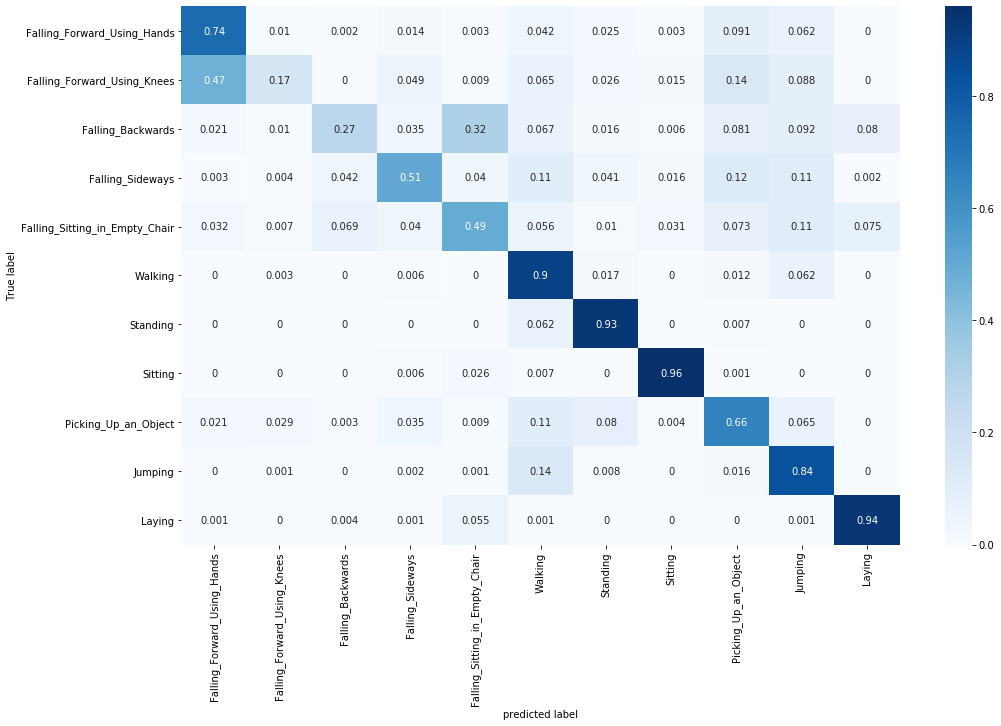

In [45]:
import seaborn as sns
axis_labels = ['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Walking','Standing','Sitting','Picking_Up_an_Object','Jumping','Laying']
figure = plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()